## Comparing Machine Learning Predcitions Using Subplots

After performing different model predictions, pherhaps using different parameters or algorithms we are often left with a large set of  predictions that we want to compare. The standard technique is to plot the predicted values ontop of the expected  values in order to quickly see if there is a good fit and that our model has managed to capture the general structure. This last bit is why a visual insepction is very beneficial even if the model has returned a high value for the R-suqare evaluation metric.   


### Automating The Plotting Procedure


If we have more than just 2 models that we are going to compare many times, then it can be very time consuming to repeatedly modify and add subplots. For this case, the best thing to do is to create a personal plotting function, or to import existing libraries to do the job for you.  
  

In [2]:
# LIBRARIES. 
# Special Libraries. 
import os 

# Numerical and Data Libraries. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.inspection import permutation_importance
from sklearn.ensemble import IsolationForest #Outlier Removal. 

# Machine Learning Models. 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb 
from sklearn import svm 
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

plt.style.use("seaborn-darkgrid")

In [3]:
# Load Example Data 
from sklearn.datasets import  load_diabetes
data = load_diabetes()

# Create DataFrame from  Data. 
df_data = pd.DataFrame(data=data["data"], columns=data["feature_names"])

# Get an Overview of the data. 
df_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


### Define Test and Training Data

In [4]:
# Chose Prediction Variable in your model.
predVar = "s1"
y = df_data[predVar]

# Variables that you do not want to include in your model. 
drop_col = [predVar]
x = df_data.drop(drop_col,axis = 1)
                                              
# Split data into random training and test-sets. 
x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size=0.2)

### Define All Machine Learning Models You Want To Compare 

In [5]:

# Store Models With Names as (name, model). 
machine_models = []

lm_model = linear_model.LinearRegression()
machine_models.append(("LM",lm_model ))

svm_model = svm.SVR()
machine_models.append(("SVM",svm_model ))

mlp_model = MLPRegressor(hidden_layer_sizes=400, max_iter = 5000)
machine_models.append(("MLP",mlp_model ))

kNeighbor_model = KNeighborsRegressor()
machine_models.append(("K-Neighbor",kNeighbor_model ))

xgb_model = xgb.XGBRegressor()
machine_models.append(("XGBoost",xgb_model ))

DTR_model = tree.DecisionTreeRegressor()
machine_models.append(("Decision Tree",DTR_model ))

elasticNet_model = ElasticNet()
machine_models.append(("elasticNet",elasticNet_model ))

RForest_model = RandomForestRegressor()
machine_models.append(("RForest_model",RForest_model ))

### Loop Over All Models, Fit & Predict. 

In [6]:
# Loop over Models. Fit to training set. 
predictions = []
for model_unit in machine_models:
    name = model_unit[0]
    model = model_unit[1]

    # Fit and Predict the values from the training and test sets. 
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)

    # Store Predictions in seperate list for later plotting. 
    predictions.append((name, prediction))
    continue 

In [7]:



def subPlotter(predList,y_blind, title, var, ylabel):
    from sklearn.metrics import r2_score
    """
    Parameters
    ----------
    predList : List of 2-tpuples (name, modelPredictions). 
        Example: [("XGBoost", y_xgb), ("MLP", y_ann), ("Rforest", y_forest)]

    y_blind : 1D List/Vector. 
        Actual Predictions 
    title : String
        Description of overall plot. 
    var : String
        x-axis label.

    Returns
    -------
    Plot.
        A plot of modelPredictions. 

    """
    # How many subplots do we have? 
    plotSize = len(predList)
    
    # Initilize Subplot figure and axis  
    fig, axes = plt.subplots(1,plotSize ,figsize = (20,10) )
    fig.suptitle(title)
    plt.ylabel(ylabel)
    
    # Loop Over All Model Predictions and add subplot.  
    for (i, prediction) in enumerate(predList):
        
        # Touple --> (name, y_pred)
        modelName = prediction[0]
        y_pred = prediction[1]
        
        # Add Subplot i. 
        axes[i].plot( y_blind, y_blind.index, ".")
        axes[i].plot( y_pred, y_blind.index, ".")
        axes[i].set_title(modelName)
        axes[i].set_xlabel(var)
       
        # Add Textbox with R2 Value At Top of each subplot. 
        R2 = round(r2_score(y_blind, y_pred), 2)
        text_box = f'R2 = {R2}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        axes[i].text(0.35, 0.99, text_box, transform=axes[i].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)
        
        # Add names to seperate predicted data from known data. 
        names = ["Actual", "Predicted"]
        axes[i].legend(names, loc = "lower right")
        continue 
    plt.show()
    return print("Subplot have been performed for model predictions.")


### Compare And Plot All Models In The Same Plot

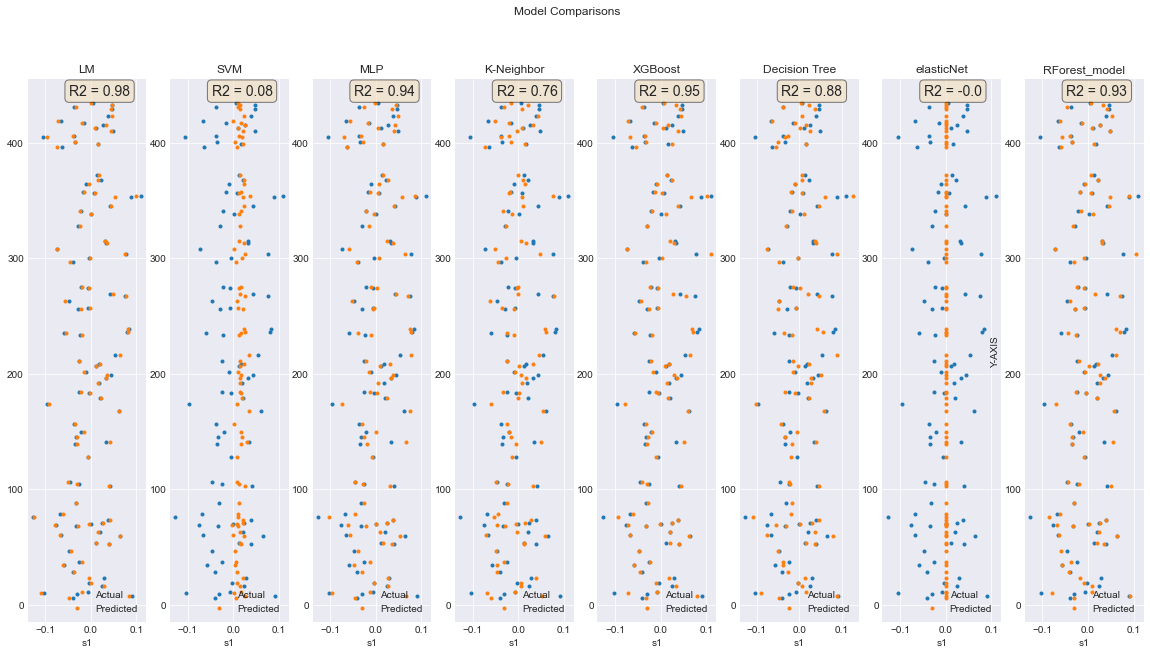

Subplot have been performed for model predictions.


In [8]:
# Plot All the Predictions Above we got Above.  
predList = predictions
title = "Model Comparisons"
var = "s1"
ylabel = "Y-AXIS "

# Normally the blind is different than the test. 
y_blind = y_test
subPlotter(predList,y_blind, title, var,ylabel)

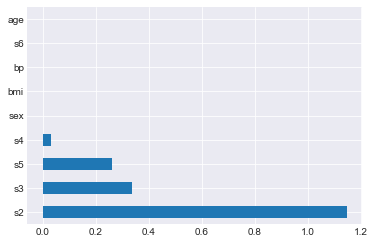

In [19]:
 
# Exstract Mean Feature Importance For Each Variable. 
feat_importance = permutation_importance(lm_model,x_test, y_test)
mean_importance = feat_importance["importances_mean"]

# Use Pandas Series Inbuilt Method to plot Sorted BarChart. 
feat_importances = pd.Series(mean_importance, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Feature Importance
From the BarChart we can look at what model-features contribute the most in our model. In same cases it can be beneficial to exclude data based on this, if the computational time can be imporved by removing data.

## Result
The above plotting-function gives us an easy overview over how the different model perform relative to each other. The R-Square value can easily be found on the top of each subplot for each model and we also see how close predictions (yellow dots) are to the actual known data (blue dots). For this case it seems that the normal linear regression model performed very well. Ofcourse, this is not always the case. 